# Analyze the pH

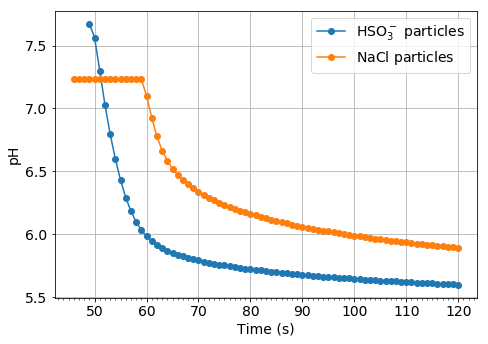

In [15]:
import sys, os
import matplotlib.pyplot as plt
import matplotlib
import scipy.io, numpy
import numpy as np
import pylab
import csv
import pandas as pd
import seaborn as sns
#np.set_printoptions(threshold=np.nan)
import sys, os
import matplotlib.pyplot as plt
import matplotlib
import scipy.io, numpy
import numpy as np
import pylab
import csv
import pandas as pd
import seaborn as sns
import matplotlib as mpl
mpl.rcParams['font.size'] = 14
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
#np.set_printoptions(threshold=np.nan)
mpl.rcParams['figure.figsize'] = 7, 5
f1  = 'mono_nacl_emit/log_HSO3m_so2_emit'
f2  = 'mono_nacl_emit/log_nacl_so2_emit'
acid_particle = pd.read_csv(f1, delim_whitespace=True, header=None)
neut_particle = pd.read_csv(f2, delim_whitespace=True, header=None)

val1 = acid_particle.values
val2 = neut_particle.values
# Creat dataframe
#d1 = {'pH_acid': val1[:,0], 'nh4_acid': val1[:,1], 'so4_acid':val1[:,2]}
#d2 = {'pH_neut': val1[:,0], 'nh4_neut': val1[:,1], 'so4_neut':val1[:,2]}
df1 = pd.DataFrame(data=val1)
df2 = pd.DataFrame(data=val2)


####ACID PARTICLES######
ph_acid = df1.iloc[:,0].values.reshape((121, 56))
ph_acid_mean = np.mean(ph_acid.astype(float), axis=1)
ph_acid_std  = np.std(ph_acid.astype(float), axis=1)


su_frac_acid = df1.iloc[:,2].values.reshape((121, 56))
su_frac_acid_mean = np.mean(su_frac_acid.astype(float), axis=1)
su_frac_acid_std  = np.std(su_frac_acid.astype(float), axis=1)

so4_acid = df1.iloc[:,1].values.reshape((121, 56))
so4_acid_mean = np.mean(so4_acid.astype(float), axis=1)
so4_acid_std  = np.std(so4_acid.astype(float), axis=1)
####Neut PARTICLES######
ph_neut = df2.iloc[:,0].values.reshape((121, 56))
ph_neut_mean = np.mean(ph_neut.astype(float), axis=1)
ph_neut_std  = np.std(ph_neut.astype(float), axis=1)


su_frac_neut = df2.iloc[:,2].values.reshape((121, 56))
su_frac_neut_mean = np.mean(su_frac_neut.astype(float), axis=1)
su_frac_neut_std  = np.std(su_frac_neut.astype(float), axis=1)

so4_neut = df2.iloc[:,1].values.reshape((121, 56))
so4_neut_mean = np.mean(so4_neut.astype(float), axis=1)
so4_neut_std  = np.std(so4_neut.astype(float), axis=1)


fig, ax = plt.subplots()
ax.plot(ph_acid_mean,marker='o', label=r'$\rm HSO_3^-$ particles')
ax.plot(ph_neut_mean,marker='o', label=r'$\rm NaCl$ particles')
#ax.plot(ph_neut_mean,marker='o', label='NaCl particles')
ax.grid()
ax.xaxis.set_major_locator(MultipleLocator(10))
ax.xaxis.set_minor_locator(MultipleLocator(1))
plt.ylabel('pH')
plt.xlabel('Time (s)')
plt.legend(loc=1)

plt.savefig("mono_nacl_emit/figure/Acid_neut_pH.pdf")
plt.tight_layout()

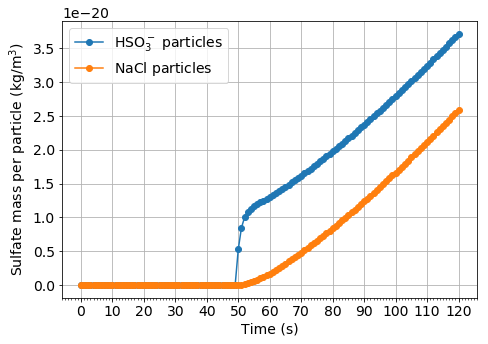

In [65]:
fig, ax = plt.subplots()
ax.plot(so4_acid_mean,marker='o', label=r'$\rm HSO_3^-$ particles')
ax.plot(so4_neut_mean,marker='o', label=r'$\rm NaCl$ particles')
#ax.plot(ph_neut_mean,marker='o', label='NaCl particles')
ax.grid()
ax.xaxis.set_major_locator(MultipleLocator(10))
ax.xaxis.set_minor_locator(MultipleLocator(1))
plt.ylabel(r'Sulfate mass per particle (kg/$\rm m^3$)')
plt.xlabel('Time (s)')
plt.legend(loc=2)

plt.savefig("mono_nacl_emit/figure/Acid_neut_sul.pdf")
plt.tight_layout()

# Gas mixing ratio

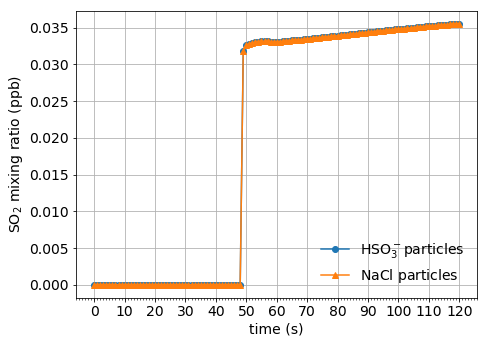

In [53]:
import sys, os
import scipy.io, numpy
import numpy as np
import pylab
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
mpl.rcParams['font.size'] = 14
#mpl.rcParams['figure.figsize'] = 6, 6

ncf1  = scipy.io.netcdf_file("mono_nacl_emit/gas_state_HSO3.nc",mmap=False)
ncf2  = scipy.io.netcdf_file("mono_nacl_emit/gas_state_HSO3.nc",mmap=False)

#environment factors
#time = ncf1.variables["time"].data / 60
gas_state_hso3   = ncf1.variables["gas_mixing_ratio"].data #/ 1e6
gas_state_nacl   = ncf2.variables["gas_mixing_ratio"].data #/ 1e6
so2_hso3  = gas_state_hso3[:,17]
so2_nacl  = gas_state_nacl[:,17]
o3_hso3 = gas_state_hso3[:,10]
o3_nacl = gas_state_nacl[:,10]


fig, ax1 = plt.subplots(figsize=(7,5))
ax1.set_xlabel('time (s)')
ax1.set_ylabel(r'$\rm SO_2$ mixing ratio (ppb)')
ax1.plot(so2_hso3, marker ='o', label=r'$\rm HSO_3^- particles$')
ax1.plot(so2_nacl, marker ='^', label=r'$\rm NaCl$ particles')
#ax1.plot(time, num_conc2, color=color, ls=':', label='Case2 number no dilution' )
ax1.grid()
ax1.xaxis.set_major_locator(MultipleLocator(10))
ax1.xaxis.set_minor_locator(MultipleLocator(1))
ax1.legend(loc=4, frameon=False)
plt.savefig("mono_nacl_emit/figure/gas_so2.pdf")
plt.tight_layout()

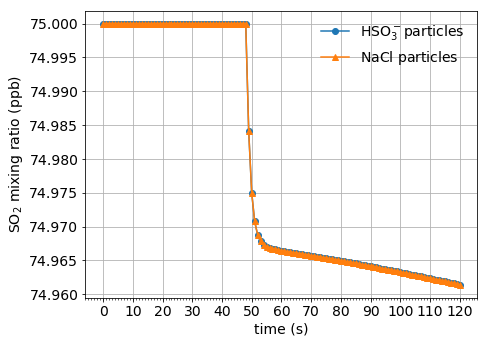

In [54]:
fig, ax1 = plt.subplots(figsize=(7,5))
color = 'tab:green'
ax1.set_xlabel('time (s)')
ax1.set_ylabel(r'$\rm SO_2$ mixing ratio (ppb)')
ax1.plot(o3_hso3, marker ='o', label=r'$\rm HSO_3^- particles$')
ax1.plot(o3_nacl, marker ='^', label=r'$\rm NaCl$ particles')
#ax1.plot(time, num_conc2, color=color, ls=':', label='Case2 number no dilution' )
ax1.grid()
ax1.xaxis.set_major_locator(MultipleLocator(10))
ax1.xaxis.set_minor_locator(MultipleLocator(1))
ax1.legend(loc=1, frameon=False)
plt.savefig("mono_nacl_emit/figure/gas_o3.pdf")
plt.tight_layout()

# Read the aSO2 and aO3 data

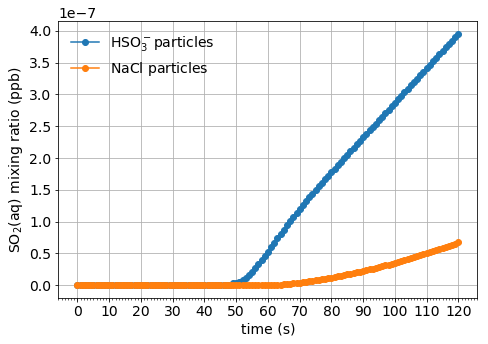

In [67]:
import sys, os
import scipy.io, numpy
import numpy as np
import pylab
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
mpl.rcParams['font.size'] = 14
#mpl.rcParams['figure.figsize'] = 6, 6

ncf1  = scipy.io.netcdf_file("mono_nacl_emit/urban_plume_aq_chem_process_hso3m.nc",mmap=False)
ncf2  = scipy.io.netcdf_file("mono_nacl_emit/urban_plume_aq_chem_process_nacl.nc",mmap=False)

#environment factors
time        = ncf1.variables["time"].data / 60
dens1        = ncf1.variables["density"].data 
aso2_hso3   = ncf1.variables["tot_aSO2_conc"].data*29/64*1e9 / dens1
ao3_hso3    = ncf1.variables["tot_aO3_conc"].data*29/48*1e9 / dens1

dens2        = ncf2.variables["density"].data 
aso2_nacl    = ncf2.variables["tot_aSO2_conc"].data*29/64*1e9 / dens2
ao3_nacl     = ncf2.variables["tot_aO3_conc"].data*29/48*1e9 / dens2



fig, ax1 = plt.subplots(figsize=(7,5))
ax1.set_xlabel('time (s)')
ax1.set_ylabel(r'$\rm SO_2{(aq)}$ mixing ratio (ppb)')
ax1.plot(aso2_hso3, marker ='o', label=r'$\rm HSO_3^- particles$')
ax1.plot(aso2_nacl, marker ='o', label=r'$\rm NaCl$ particles')
#ax1.plot(time, num_conc2, color=color, ls=':', label='Case2 number no dilution' )
ax1.grid()
ax1.xaxis.set_major_locator(MultipleLocator(10))
ax1.xaxis.set_minor_locator(MultipleLocator(1))
ax1.legend(loc=2, frameon=False)
plt.savefig("mono_nacl_emit/figure/aq_so2.pdf")
plt.tight_layout()

In [49]:
print(ao3_hso3)
print(ao3_nacl)

[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 8.76430376e-09 2.72960766e-08 6.20905955e-08
 1.13905815e-07 1.81839529e-07 2.64188976e-07 3.58855966e-07
 4.63594045e-07 5.76178018e-07 6.94521710e-07 8.16753602e-07
 9.41258293e-07 1.06669094e-06 1.19197250e-06 1.31627047e-06
 1.43897198e-06 1.559652

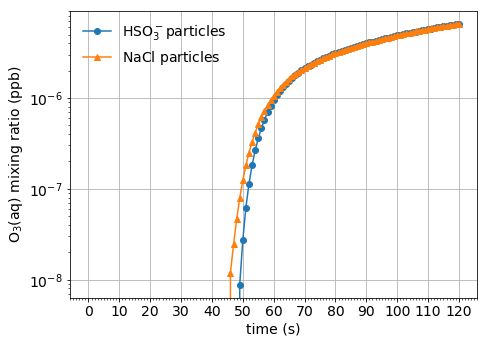

In [68]:
fig, ax1 = plt.subplots(figsize=(7,5))
ax1.set_xlabel('time (s)')
ax1.set_yscale('log')
ax1.set_ylabel(r'$\rm O_3{(aq)}$ mixing ratio (ppb)')
ax1.plot(ao3_hso3, marker ='o', label=r'$\rm HSO_3^- particles$')
ax1.plot(ao3_nacl, marker ='^', label=r'$\rm NaCl$ particles')
#ax1.plot(time, num_conc2, color=color, ls=':', label='Case2 number no dilution' )
ax1.grid()
ax1.xaxis.set_major_locator(MultipleLocator(10))
ax1.xaxis.set_minor_locator(MultipleLocator(1))
ax1.legend(loc=2, frameon=False)
plt.savefig("mono_nacl_emit/figure/aq_o3.pdf")
plt.tight_layout()

# Two modes at the same time

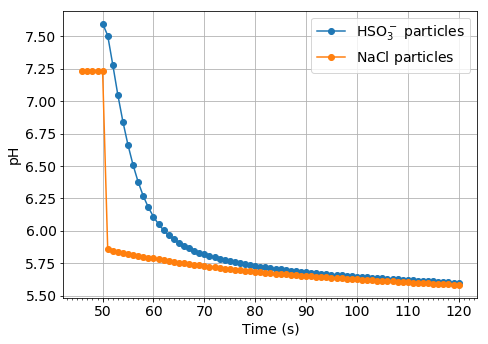

In [57]:
import sys, os
import matplotlib.pyplot as plt
import matplotlib
import scipy.io, numpy
import numpy as np
import pylab
import csv
import pandas as pd
import seaborn as sns
#np.set_printoptions(threshold=np.nan)
import sys, os
import matplotlib.pyplot as plt
import matplotlib
import scipy.io, numpy
import numpy as np
import pylab
import csv
import pandas as pd
import seaborn as sns
import matplotlib as mpl
mpl.rcParams['font.size'] = 14
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
#np.set_printoptions(threshold=np.nan)
mpl.rcParams['figure.figsize'] = 7, 5
f1  = 'mono_nacl_emit/log_twomodes_HSO3m_so2_emit'
f2  = 'mono_nacl_emit/log_twomodes_nacl_so2_emit'
acid_particle = pd.read_csv(f1, delim_whitespace=True, header=None)
neut_particle = pd.read_csv(f2, delim_whitespace=True, header=None)

val1 = acid_particle.values
val2 = neut_particle.values
# Creat dataframe
#d1 = {'pH_acid': val1[:,0], 'nh4_acid': val1[:,1], 'so4_acid':val1[:,2]}
#d2 = {'pH_neut': val1[:,0], 'nh4_neut': val1[:,1], 'so4_neut':val1[:,2]}
df1 = pd.DataFrame(data=val1)
df2 = pd.DataFrame(data=val2)


####ACID PARTICLES######
ph_acid = df1.iloc[:,0].values.reshape((121, 27))
ph_acid_mean = np.mean(ph_acid.astype(float), axis=1)
ph_acid_std  = np.std(ph_acid.astype(float), axis=1)


so4_acid = df1.iloc[:,1].values.reshape((121, 27))
so4_acid_mean = np.mean(so4_acid.astype(float), axis=1)
so4_acid_std  = np.std(so4_acid.astype(float), axis=1)
####Neut PARTICLES######
ph_neut = df2.iloc[:,0].values.reshape((121, 26))
ph_neut_mean = np.mean(ph_neut.astype(float), axis=1)
ph_neut_std  = np.std(ph_neut.astype(float), axis=1)

so4_neut = df2.iloc[:,1].values.reshape((121, 26))
so4_neut_mean = np.mean(so4_neut.astype(float), axis=1)
so4_neut_std  = np.std(so4_neut.astype(float), axis=1)


fig, ax = plt.subplots()
ax.plot(ph_acid_mean,marker='o', label=r'$\rm HSO_3^-$ particles')
ax.plot(ph_neut_mean,marker='o', label=r'$\rm NaCl$ particles')
#ax.plot(ph_neut_mean,marker='o', label='NaCl particles')
ax.grid()
ax.xaxis.set_major_locator(MultipleLocator(10))
ax.xaxis.set_minor_locator(MultipleLocator(1))
plt.ylabel('pH')
plt.xlabel('Time (s)')
plt.legend(loc=1)

plt.savefig("mono_nacl_emit/figure/Acid_neut_pH_twomodes.pdf")
plt.tight_layout()

In [62]:
so4_neut_mean

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 7.44964030e-23,
       1.72082255e-22, 2.92787647e-22, 4.36950993e-22, 6.04012614e-22,
      

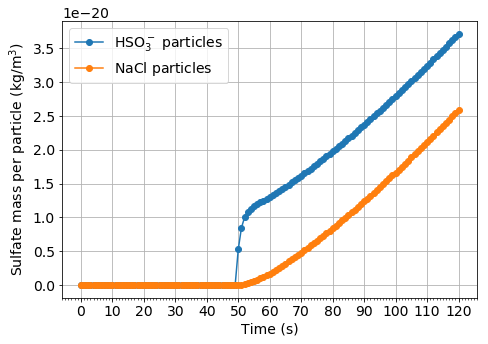

In [66]:
fig, ax = plt.subplots()
#ax.set_yscale('log')
ax.plot(so4_acid_mean,marker='o', label=r'$\rm HSO_3^-$ particles')
ax.plot(so4_neut_mean,marker='o', label=r'$\rm NaCl$ particles')
#ax.plot(ph_neut_mean,marker='o', label='NaCl particles')
ax.grid()
ax.xaxis.set_major_locator(MultipleLocator(10))
ax.xaxis.set_minor_locator(MultipleLocator(1))
plt.ylabel(r'Sulfate mass per particle (kg/$\rm m^3$)')
plt.xlabel('Time (s)')
plt.legend(loc=2)

plt.savefig("mono_nacl_emit/figure/Acid_neut_sul_twomodes.pdf")
plt.tight_layout()

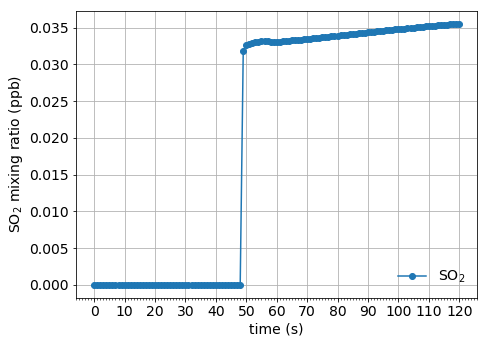

In [61]:
import sys, os
import scipy.io, numpy
import numpy as np
import pylab
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
mpl.rcParams['font.size'] = 14
#mpl.rcParams['figure.figsize'] = 6, 6

ncf1  = scipy.io.netcdf_file("mono_nacl_emit/gas_state_twomodes.nc",mmap=False)

#environment factors
#time = ncf1.variables["time"].data / 60
gas_state   = ncf1.variables["gas_mixing_ratio"].data #/ 1e6
so2  = gas_state_hso3[:,17]
o3 = gas_state_hso3[:,10]


fig, ax1 = plt.subplots(figsize=(7,5))
ax1.set_xlabel('time (s)')
ax1.set_ylabel(r'$\rm SO_2$ mixing ratio (ppb)')
ax1.plot(so2, marker ='o', label=r'$\rm SO_2$')
#ax1.plot(o3, marker ='o', label=r'$\rm SO_2$')

#ax1.plot(time, num_conc2, color=color, ls=':', label='Case2 number no dilution' )
ax1.grid()
ax1.xaxis.set_major_locator(MultipleLocator(10))
ax1.xaxis.set_minor_locator(MultipleLocator(1))
ax1.legend(loc=4, frameon=False)
plt.savefig("mono_nacl_emit/figure/gas_twomodes.pdf")
plt.tight_layout()